<a href="https://colab.research.google.com/github/sirvi2002/algorithm/blob/master/vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [150, 150]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'


MyDrive  Shareddrives


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/train'
test_path = '/content/drive/MyDrive/testing'

Working with 120 images
Image examples: 
2022-10-30 12_06_08.554637.jpg


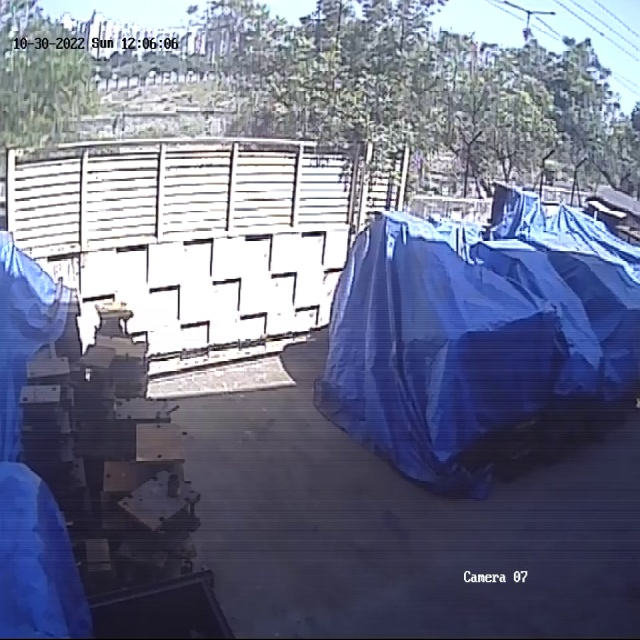

2022-10-30 10_11_31.629687.jpg


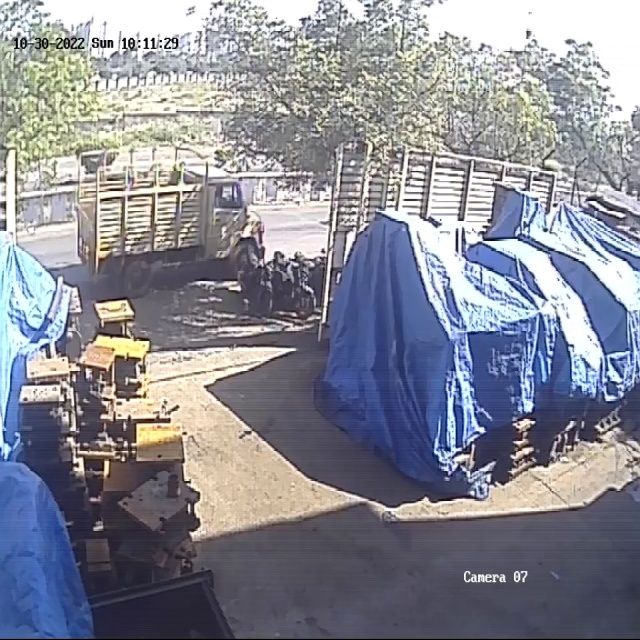

2022-10-30 12_53_22.794645.jpg


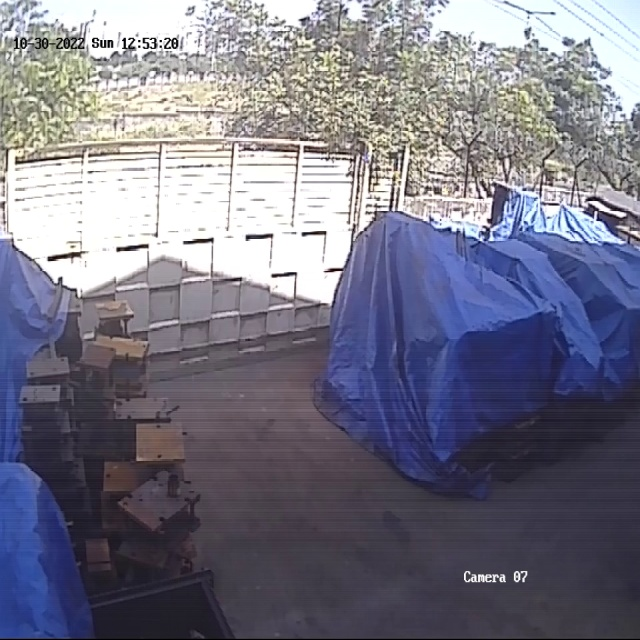

2022-11-02 10_29_35.304105.jpg


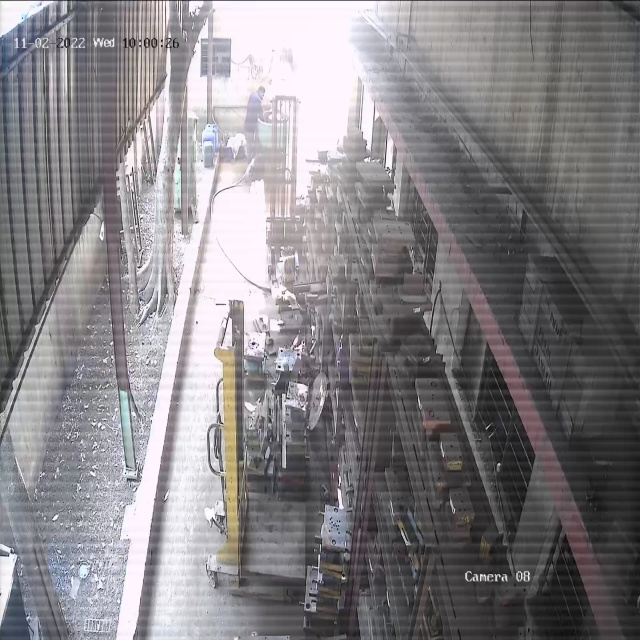

2022-10-31 13_14_47.731797.jpg


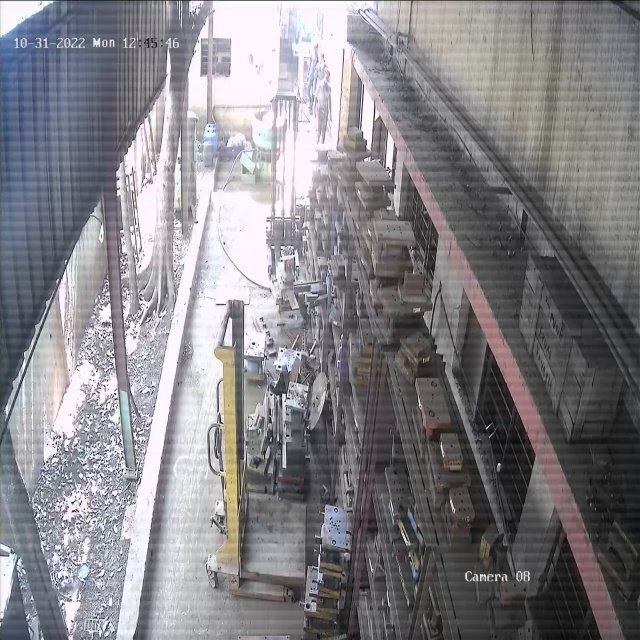

2022-11-01 16_25_19.602270.jpg


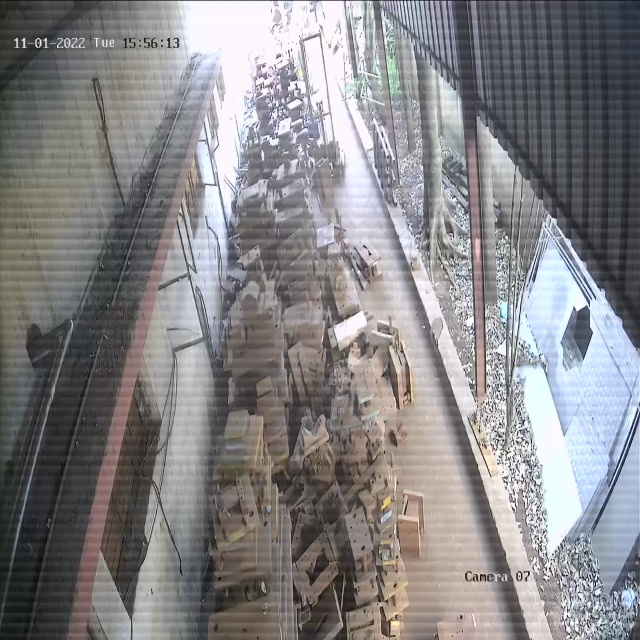

2022-10-31 09_10_25.103694.jpg


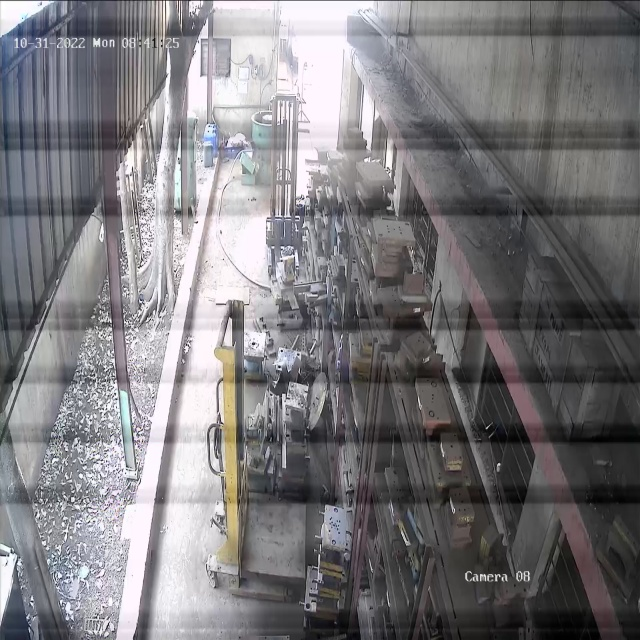

2022-10-30 12_23_58.631214.jpg


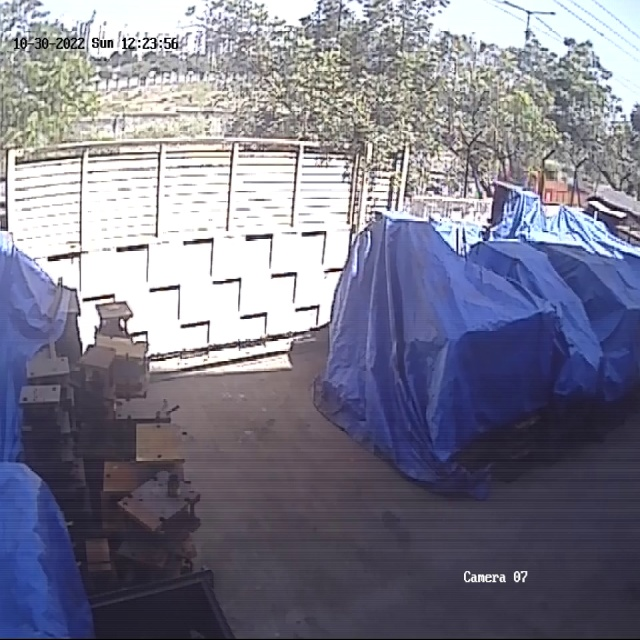

2022-10-29 11_44_02.501887.jpg


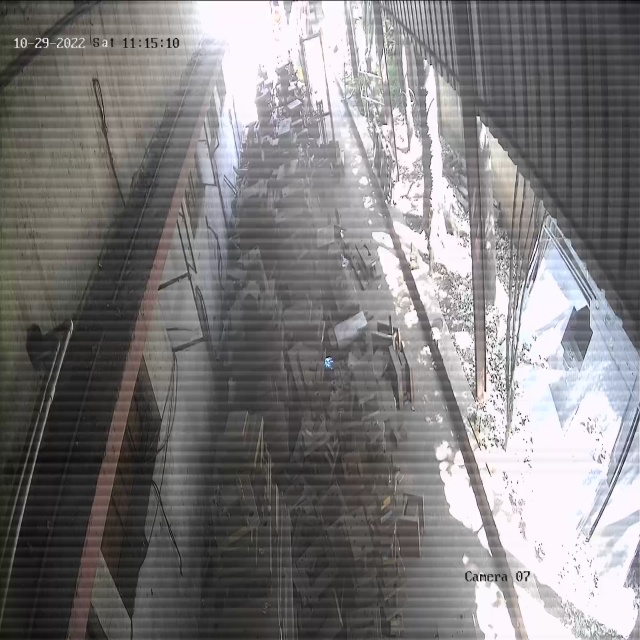

2022-10-30 10_15_05.962462.jpg


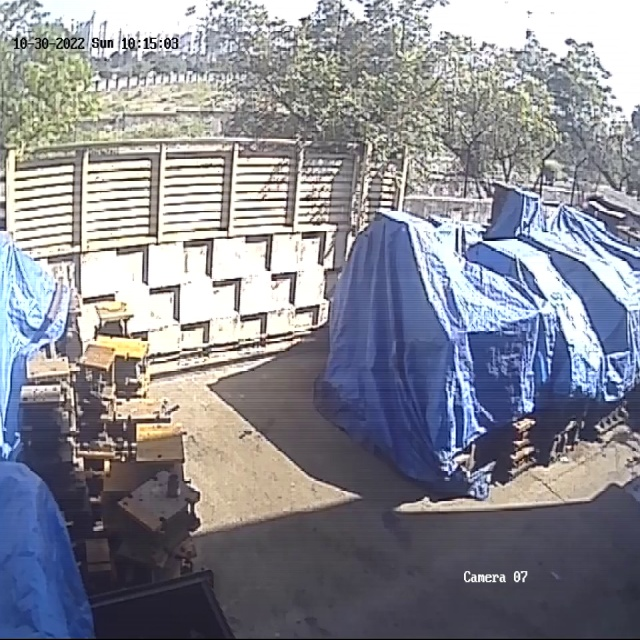

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/noise'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/train/*')
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)

#dense1 = Dense(256 , activation='softmax')(x)

prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
     )

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                  shuffle=False )

Found 240 images belonging to 2 classes.


In [ ]:
train_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False )

Found 10 images belonging to 2 classes.


In [ ]:
test_set.class_indices

{'clean': 0, 'noise': 1}

In [ ]:
train_set.class_indices

{'clean': 0, 'noise': 1}

In [ ]:
test_set.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]
start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=train_set,
  epochs=3,
  steps_per_epoch=2,
  #validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-60-e62a53d37dba>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/3

Epoch 1: val_loss improved from inf to 0.94902, saving model to mymodel.h5
2/2 - 78s - loss: 0.4755 - accuracy: 0.9531 - val_loss: 0.9490 - val_accuracy: 0.8792 - 78s/epoch - 39s/step
Epoch 2/3

Epoch 2: val_loss did not improve from 0.94902
2/2 - 79s - loss: 0.7744 - accuracy: 0.8906 - val_loss: 1.0343 - val_accuracy: 0.8917 - 79s/epoch - 39s/step
Epoch 3/3

Epoch 3: val_loss did not improve from 0.94902
2/2 - 98s - loss: 1.2683 - accuracy: 0.8438 - val_loss: 1.1783 - val_accuracy: 0.8667 - 98s/epoch - 49s/step
Training completed in time:  0:05:02.524191


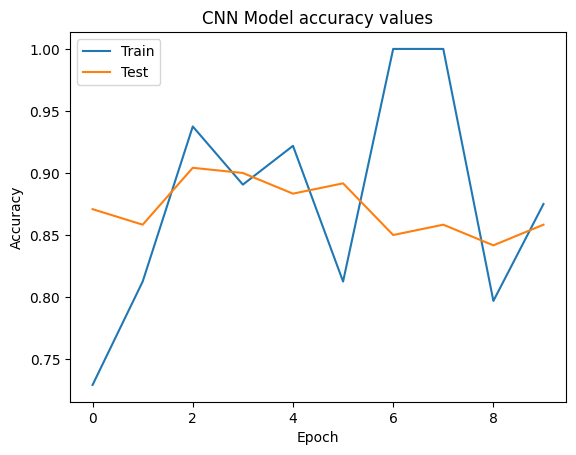

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
print("Evaluate on test data")

results = model.evaluate(test_set, batch_size=32)

print("test loss, test acc:", results)


Evaluate on test data
1/1 [==============================] - 2s 2s/step - loss: 1.2771 - accuracy: 0.7000
test loss, test acc: [1.2771259546279907, 0.699999988079071]


In [ ]:
from sklearn import metrics
start = datetime.now()
pred= model.predict(test_set)
duration = datetime.now() - start
print(duration)


1/1 [==============================] - 2s 2s/step
0:00:02.406541


In [ ]:
pred=np.argmax(pred, axis=-1)
pred


array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
swap = {0: 1, 1:0}
swap[pred[0]]
print(len(pred))
for i in range(0,10):
  if pred[i] == 1:
    pred[i] = 0
  elif pred[i] == 0:
    pred[i] = 1

pred

10


array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
test_set.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

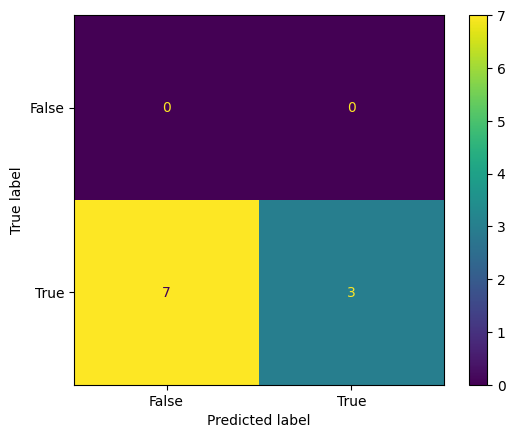

In [ ]:
confusion_matrix = metrics.confusion_matrix(test_set.labels , pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(test_set.labels , pred))
print('Recall: %.3f' % recall_score(test_set.labels , pred))


Precision: 1.000
Recall: 0.100


### PREDICTION

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def predictImage(filename):
    img1 = load_img(filename,target_size=(150,150))
    
    # plt.imshow(img1)
    cv2_imshow(cv2.imread(filename))
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    #if val == 1:
        #print("Noise")
        # plt.xlabel("Noise",fontsize=30)
        
    
    #elif val == 0:
        #print("Clean")
        # plt.xlabel("Clean",fontsize=30)



In [ ]:
import glob

print("Testing noisy images")
for img in glob.glob('/content/drive/MyDrive/test/Noise/*.jpg'):
  predictImage(img)
print("Testing clean images")
for img in glob.glob('/content/drive/MyDrive/test/Clean/*.jpg'):
  predictImage(img)


Testing noisy images
Testing clean images


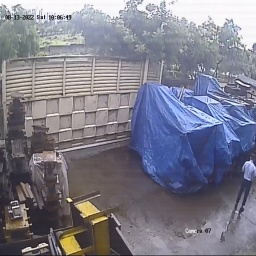

1/1 [==============================] - 0s 249ms/step
[[0.02494016 0.9750598 ]]
0:00:00.366688


In [ ]:
from skimage.io import imread, imshow
import glob
from tensorflow.keras.utils import load_img, img_to_array
#img = plt.imread('clea.jpg')

start = datetime.now()

predictImage('2022-08-13 10_06_51.972798.jpg')

print(datetime.now()-start)

# New section

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    # plt.imshow(img1)
    cv2_imshow(cv2.imread(filename))
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    '''if val == 1:
        print("Noise")
        # plt.xlabel("Noise",fontsize=30)
        
    
    elif val == 0:
        print("Clean")
        # plt.xlabel("Clean",fontsize=30)'''

In [ ]:
import glob

print("Testing noisy images")
for img in glob.glob('/content/drive/MyDrive/test/Noise/*.jpg'):
  predictImage(img)
print("Testing clean images")
for img in glob.glob('/content/drive/MyDrive/test/Clean/*.jpg'):
  predictImage(img)

Testing noisy images
Testing clean images
